In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
#import shap

## feature engineering libraries
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split

## model preparation libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

## model evaluation libraries
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold

## model hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import joblib
%matplotlib inline

import os

pd.set_option("display.max_columns",999)
pd.set_option("display.max_rows",150)

import warnings

warnings.filterwarnings('ignore')

import dabl

import missingno as msno

In [2]:
os.chdir("F:\TMLC\EnergyPrediciton")

In [3]:
os.getcwd()


'F:\\TMLC\\EnergyPrediciton'

## Reading Datasets

In [4]:
df_train = pd.read_csv("train_dataset.csv")
x_test = pd.read_csv("x_test.csv")
y_test = pd.read_csv("y_test.csv")
df_test = pd.merge(x_test,y_test,how="left",on='id')
observations=[]

##  EDA on Training and Test Set

In [5]:
df_train.head()

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                11.0        2.4                36              50.5   
1                45.0        1.8                36              50.5   
2                97.0        1.8                36              50.5   
3                46.0        1.8                36              50.5   
4               100.0        2.4                36              50.5   

   january_max_temp  february_min_temp  february_avg_temp  february_max_temp  \
0                68                 35          50.589286                 73   
1                68                 35          50.589286                 73   
2                68                 35          50.589286                 73   
3                68                 35          50.589286                 73   
4                68                 35          50.589286                 73   

   march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
0              40       53.693548              80              41   
1              40       53.693548              80              41   
2              40       53.693548              80              41   
3              40       53.693548              80              41   
4              40       53.693548              80              41   

   april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  may_max_temp  \
0            55.5              78            46     56.854839            84   
1            55.5              78            46     56.854839            84   
2            55.5              78            46     56.854839            84   
3            55.5              78            46     56.854839            84   
4            55.5              78            46     56.854839            84   

   june_min_temp  june_avg_temp  june_max_temp  july_min_temp  july_avg_temp  \
0             50           60.5             90             52      62.725806   
1             50           60.5             90             52      62.725806   
2             50           60.5             90             52      62.725806   
3             50           60.5             90             52      62.725806   
4             50           60.5             90             52      62.725806   

   july_max_temp  august_min_temp  august_avg_temp  august_max_temp  \
0             84               52         62.16129               85   
1             84               52         62.16129               85   
2             84               52         62.16129               85   
3             84               52         62.16129               85   
4             84               52         62.16129               85   

   september_min_temp  september_avg_temp  september_max_temp  \
0                  52               64.65                  90   
1                  52               64.65                  90   
2                  52               64.65                  90   
3                  52               64.65                  90   
4                  52               64.65                  90   

   october_min_temp  october_avg_temp  october_max_temp  november_min_temp  \
0                47         63.016129                83                 43   
1                47         63.016

In [6]:
df_train.shape

(75757, 64)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9705 entries, 0 to 9704
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                9705 non-null   int64  
 1   State_Factor               9705 non-null   object 
 2   building_class             9705 non-null   object 
 3   facility_type              9705 non-null   object 
 4   floor_area                 9705 non-null   float64
 5   year_built                 9613 non-null   float64
 6   energy_star_rating         7451 non-null   float64
 7   ELEVATION                  9705 non-null   float64
 8   january_min_temp           9705 non-null   int64  
 9   january_avg_temp           9705 non-null   float64
 10  january_max_temp           9705 non-null   int64  
 11  february_min_temp          9705 non-null   int64  
 12  february_avg_temp          9705 non-null   float64
 13  february_max_temp          9705 non-null   int64

In [9]:
df_train["building_age"]=pd.datetime.now().year - df_train.year_built
df_test["building_age"]= pd.datetime.now().year - df_test.year_built
#df.drop(columns=["year_built"],inplace=True)


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9705 entries, 0 to 9704
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                9705 non-null   int64  
 1   State_Factor               9705 non-null   object 
 2   building_class             9705 non-null   object 
 3   facility_type              9705 non-null   object 
 4   floor_area                 9705 non-null   float64
 5   year_built                 9613 non-null   float64
 6   energy_star_rating         7451 non-null   float64
 7   ELEVATION                  9705 non-null   float64
 8   january_min_temp           9705 non-null   int64  
 9   january_avg_temp           9705 non-null   float64
 10  january_max_temp           9705 non-null   int64  
 11  february_min_temp          9705 non-null   int64  
 12  february_avg_temp          9705 non-null   float64
 13  february_max_temp          9705 non-null   int64

## Analysing Missing Values 

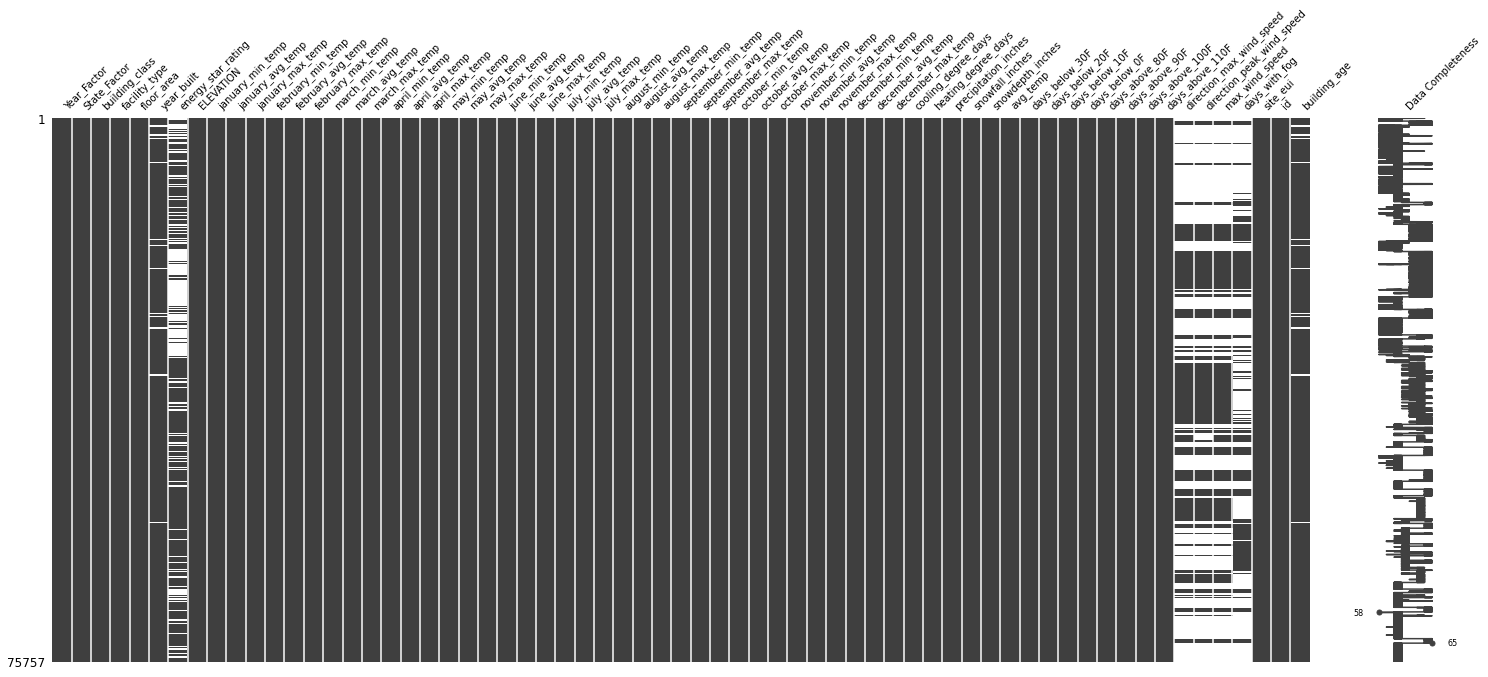

In [11]:
# Train Set
msno.matrix(df_train, labels=True,fontsize=10)
#msno.matrix(df)
plt.show()

In [12]:
pd.DataFrame((df_train.isnull().sum()/df_train.shape[0])*100,columns=["Missing %"]).sort_values(by="Missing %",ascending=False)[:7]

Missing %
days_with_fog              60.451179
direction_peak_wind_speed  55.190939
direction_max_wind_speed   54.228652
max_wind_speed             54.228652
energy_star_rating         35.256148
building_age                2.424858
year_built                  2.424858

In [13]:
#dropping  columns with more than 50% missings
df_train.drop(columns=["direction_max_wind_speed","direction_peak_wind_speed","max_wind_speed","days_with_fog"],inplace=True)

In [14]:
pd.DataFrame((df_train.isnull().sum()/df_train.shape[0])*100,columns=["Missing %"]).sort_values(by="Missing %",ascending=False)[:7]

Missing %
energy_star_rating    35.256148
building_age           2.424858
year_built             2.424858
precipitation_inches   0.000000
september_max_temp     0.000000
october_min_temp       0.000000
october_avg_temp       0.000000

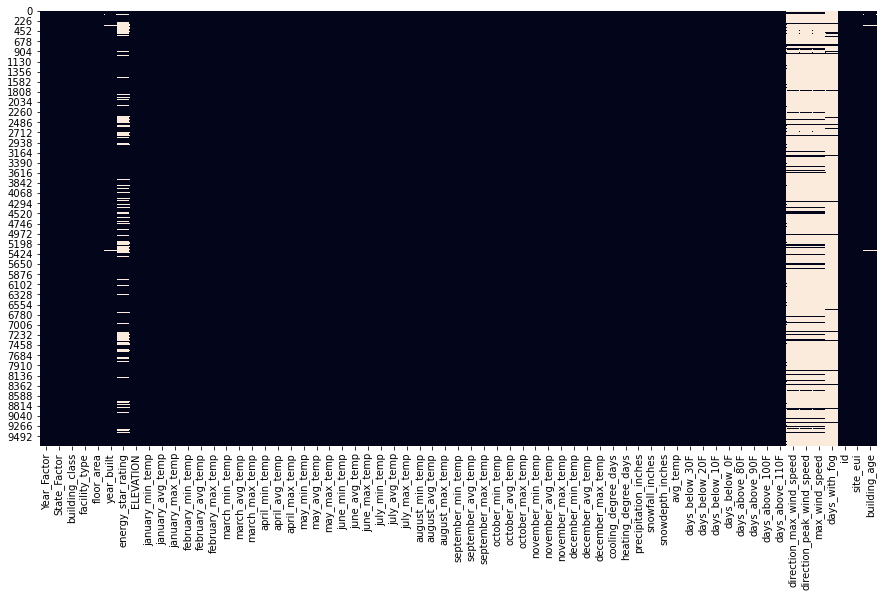

In [57]:
#test set
plt.figure(figsize=(15, 8))

sns.heatmap(df_test.isnull(), cbar=False)

plt.show()


In [15]:
pd.DataFrame((df_test.isnull().sum()/df_test.shape[0])*100,columns=["Missing %"]).sort_values(by="Missing %",ascending=False)[:8]

Missing %
days_with_fog              93.941267
direction_max_wind_speed   88.356517
direction_peak_wind_speed  88.356517
max_wind_speed             88.356517
energy_star_rating         23.225142
building_age                0.947965
year_built                  0.947965
october_max_temp            0.000000

In [16]:
#dropping  columns with more than 50% missings
df_test.drop(columns=["direction_max_wind_speed","direction_peak_wind_speed","max_wind_speed","days_with_fog"],inplace=True)

In [17]:
pd.DataFrame((df_test.isnull().sum()/df_test.shape[0])*100,columns=["Missing %"]).sort_values(by="Missing %",ascending=False)[:8]

Missing %
energy_star_rating    23.225142
building_age           0.947965
year_built             0.947965
precipitation_inches   0.000000
september_max_temp     0.000000
october_min_temp       0.000000
october_avg_temp       0.000000
october_max_temp       0.000000

In [18]:
df_train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [19]:
# seperating numerical and categorical variabled for EDA and feature engineering

num_col = [ i for i in df_train.columns if df_train[i].dtypes in ['int64','float64']]
cat_col =[ i for i in df_train.columns if df_train[i].dtypes in ['O']]

In [20]:
train_num_df = df_train[num_col]
#num_df.drop(columns=['site_eui'],inplace=True)
train_cat_df = df_train[cat_col]
y_train = df_train['site_eui']

In [21]:
train_num_df.shape

(75757, 58)

In [22]:
train_cat_df.shape

(75757, 3)

In [23]:
df_test.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [24]:
# seperating numerical and categorical variabled for EDA and feature engineering

num_col = [ i for i in df_test.columns if df_test[i].dtypes in ['int64','float64']]
cat_col =[ i for i in df_test.columns if df_test[i].dtypes in ['O']]

test_num_df = df_test[num_col]
#num_df.drop(columns=['site_eui'],inplace=True)
test_cat_df = df_test[cat_col]
y_test = df_test['site_eui']

## Univariate Analysis

<AxesSubplot:xlabel='site_eui'>

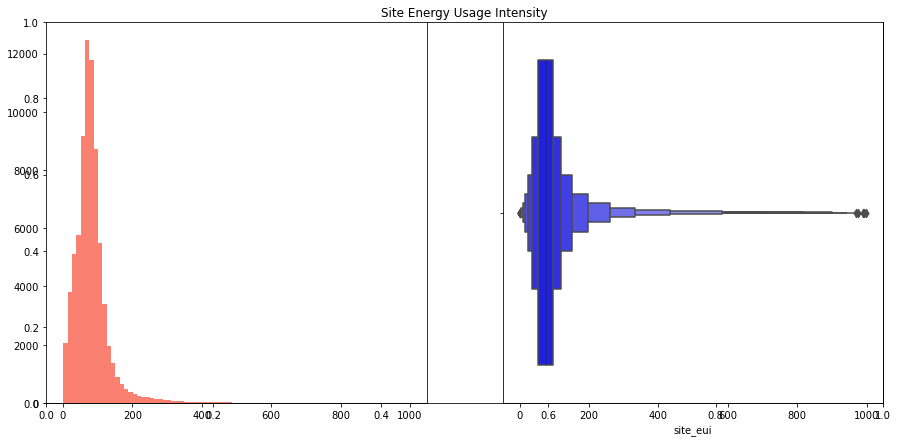

In [25]:
figs = plt.figure(figsize=(15,7))
plt.title("Site Energy Usage Intensity")
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
plt.xlabel("SITE EUI")
ax1.hist(y_train, bins=80, color="salmon")
sns.boxenplot(y_train,color="blue")

In [26]:
observations.append("Target variable is rightly/positively skewed")

In [27]:
y_train.skew()

4.739972264741652

### Numerical  Columns

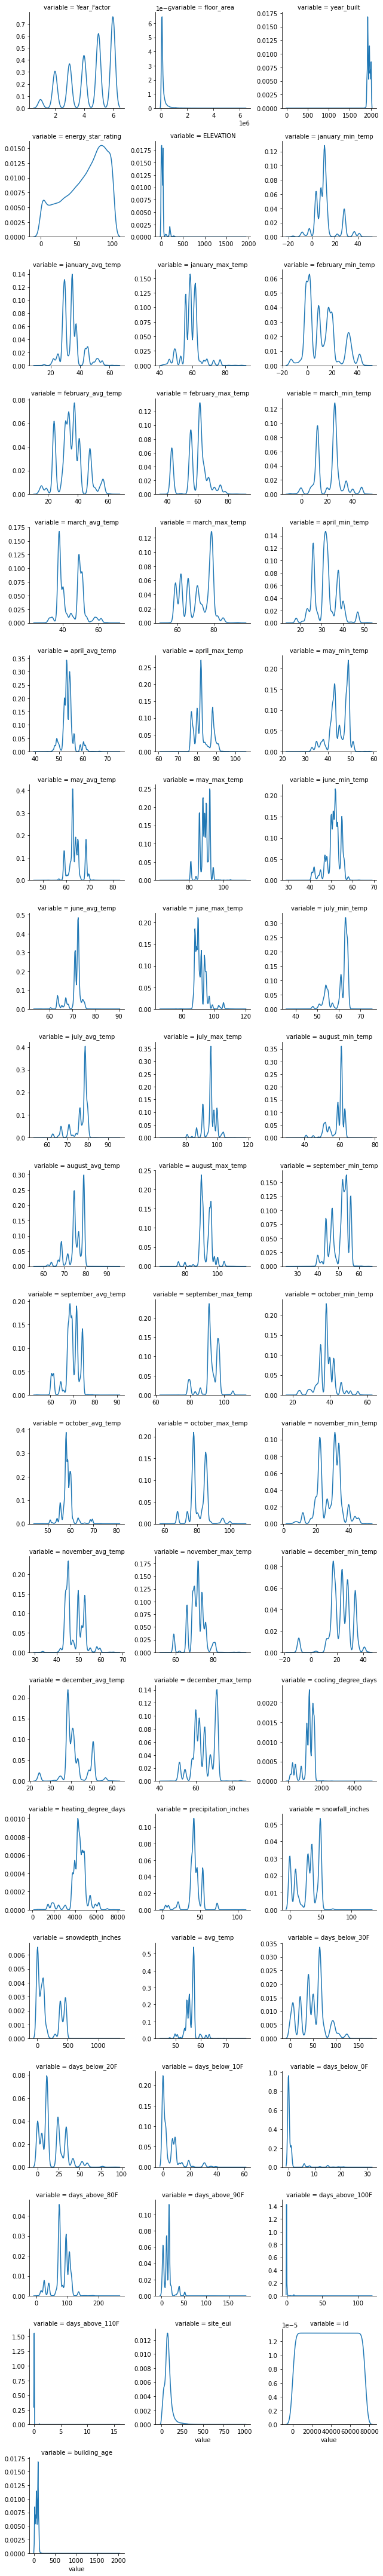

In [28]:
unpivot = pd.melt(frame=train_num_df,value_vars=train_num_df.describe().columns[:])
g = sns.FacetGrid(unpivot, col = "variable",col_wrap=3, sharex=False, sharey=False)
g.map(sns.kdeplot,"value")
plt.show()

In [29]:
train_num_df["days_above_110F"].value_counts()

0     75696
1        40
10        6
2         5
3         5
16        2
8         1
5         1
15        1
Name: days_above_110F, dtype: int64

In [30]:
#days above 100F 94% values are 0 so removing it
(train_num_df.days_above_100F.value_counts()/train_num_df.days_above_100F.shape[0]) * 100


0      94.634159
1       3.142944
10      1.384691
5       0.403923
7       0.064680
13      0.056760
12      0.027720
2       0.027720
11      0.026400
16      0.025080
42      0.022440
31      0.022440
15      0.015840
34      0.014520
14      0.014520
18      0.009240
24      0.009240
32      0.009240
9       0.007920
30      0.007920
3       0.007920
45      0.007920
115     0.007920
28      0.006600
43      0.005280
17      0.005280
22      0.003960
36      0.003960
27      0.002640
37      0.002640
26      0.002640
8       0.002640
20      0.002640
119     0.002640
21      0.001320
48      0.001320
117     0.001320
29      0.001320
39      0.001320
95      0.001320
Name: days_above_100F, dtype: float64

In [31]:
train_num_df.drop(columns=['days_below_0F','days_above_100F',"days_above_110F"],inplace=True)
test_num_df.drop(columns=['days_below_0F','days_above_100F',"days_above_110F"],inplace=True)


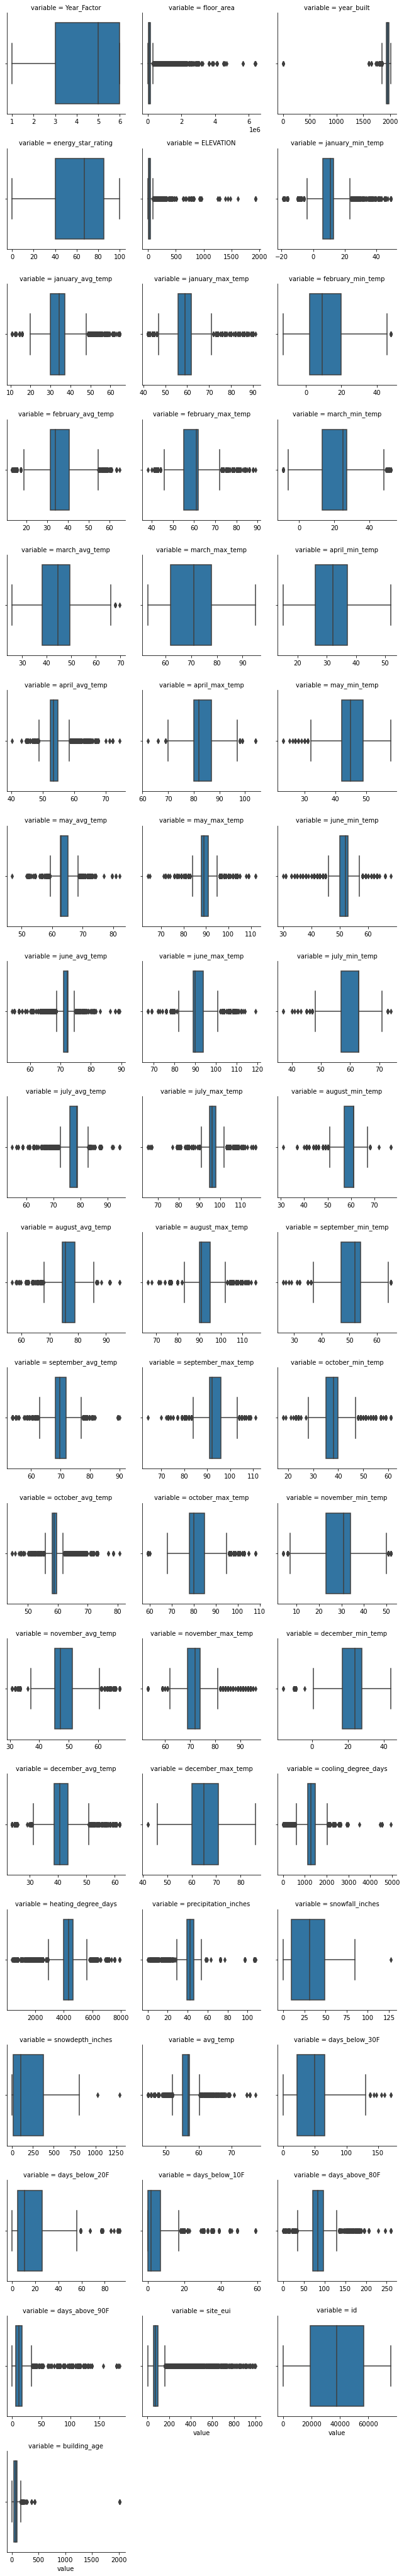

In [32]:
unpivot = pd.melt(frame=train_num_df,value_vars=train_num_df.describe().columns[:])
g = sns.FacetGrid(unpivot, col = "variable",col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot,"value")
plt.show()

### Relationship between Site EUI and Object variables

## Building Class vs Site EUI 

 There are two building classes in the data, commercial and residential. Each of them has several subtypes captured in the facility_type variable.

In [33]:
df_train.building_class.value_counts()

Residential    43558
Commercial     32199
Name: building_class, dtype: int64

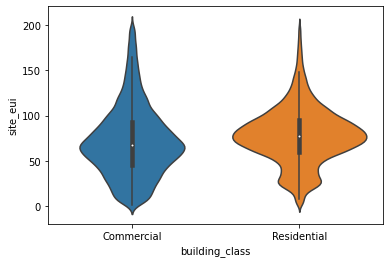

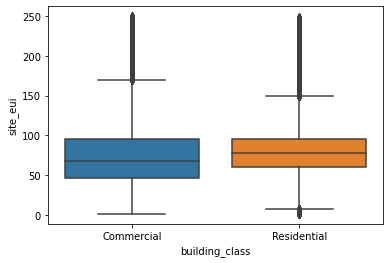

In [34]:
sns.violinplot(data=df_train[df_train['site_eui']<200], 
                    x='building_class', y='site_eui')
plt.show()
sns.boxplot(data=df_train[df_train['site_eui']<250], 
                    x='building_class', y='site_eui')
plt.show()


##### Resedential houses have high eui

### State Factor vs Site EUI

In [35]:
df_train["State_Factor"].value_counts()

State_6     50840
State_11     6412
State_1      5618
State_2      4871
State_4      4300
State_8      3701
State_10       15
Name: State_Factor, dtype: int64

<AxesSubplot:xlabel='State_Factor', ylabel='site_eui'>

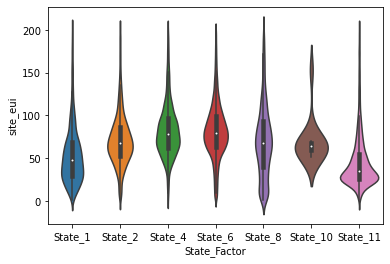

In [36]:
sns.violinplot(data=df_train[df_train["site_eui"]<200],x="State_Factor",y="site_eui")

In [37]:
df_train.groupby(["State_Factor"])["site_eui"].sum()

State_Factor
State_1     3.494182e+05
State_10    1.028956e+03
State_11    3.461790e+05
State_2     3.793241e+05
State_4     4.093570e+05
State_6     4.447535e+06
State_8     3.235267e+05
Name: site_eui, dtype: float64

#### State 6 has more high site eui because of more builings, I think State 6 is bigger 

In [38]:
df_train.pivot_table(index="State_Factor",columns="building_class",values="site_eui",aggfunc="sum")

building_class    Commercial   Residential
State_Factor                              
State_1         3.310770e+05  1.834118e+04
State_10        1.028956e+03           NaN
State_11        2.167135e+05  1.294655e+05
State_2         2.609674e+05  1.183568e+05
State_4         2.778459e+05  1.315110e+05
State_6         1.377923e+06  3.069612e+06
State_8         2.956773e+05  2.784939e+04

<AxesSubplot:xlabel='State_Factor', ylabel='count'>

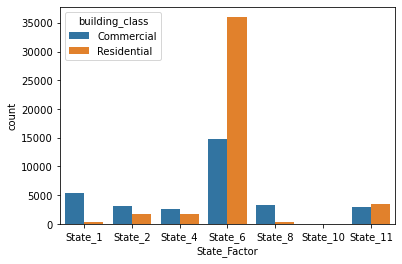

In [39]:
sns.countplot(data=df_train,x="State_Factor",hue="building_class")

In [40]:
df_train.pivot_table(index="State_Factor",columns="building_class",values="id",aggfunc="count")

building_class  Commercial  Residential
State_Factor                           
State_1             5350.0        268.0
State_10              15.0          NaN
State_11            2996.0       3416.0
State_2             3069.0       1802.0
State_4             2634.0       1666.0
State_6            14819.0      36021.0
State_8             3316.0        385.0

In [41]:
df_train[df_train["State_Factor"]=="State_6"].shape

(50840, 61)

#### State 6 has more Resedential Buildings count
#### state 10 have only 62 comercial buildings
#### state1,2,4,10 have more commercial
#### state 11,6 more on resedential buildings

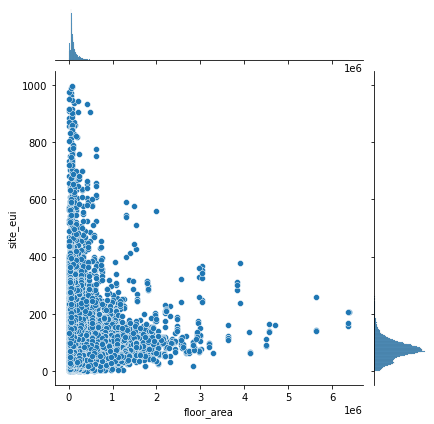

In [42]:
sns.jointplot(data=df_train, x="floor_area", y="site_eui",kind="scatter")

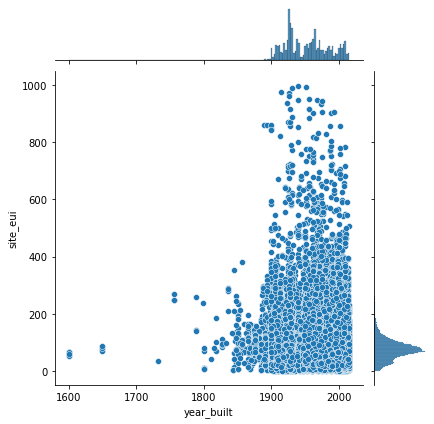

In [43]:
sns.jointplot(data=df_train[df_train['year_built']!=0], x="year_built", y="site_eui",kind="scatter")


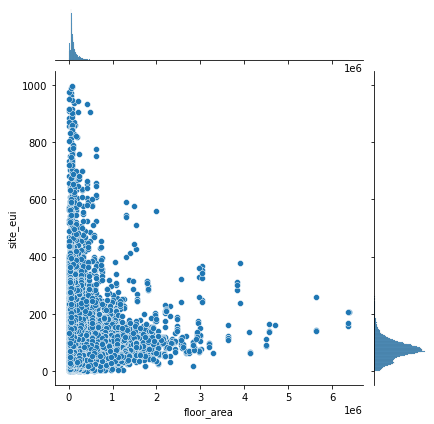

In [44]:
sns.jointplot(data=df_train, x="floor_area", y="site_eui",kind="scatter")

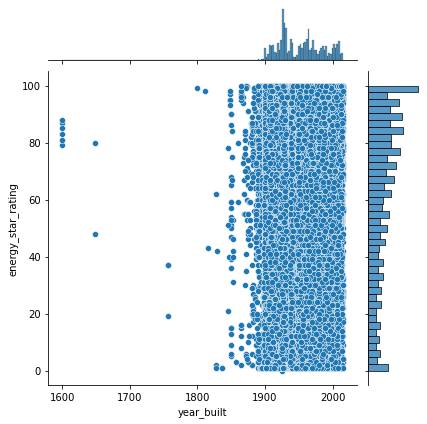

In [45]:
sns.jointplot(data=df_train[df_train['year_built']!=0], x="year_built", y="energy_star_rating",kind="scatter")


In [46]:
num_col1 = [i for i in train_num_df.columns if i not in ([i for i in train_num_df.columns if ('max' in i or 'min' in i) and 'temp' in i])]
#only taking average tempratures

In [47]:
num_col1

['Year_Factor',
 'floor_area',
 'year_built',
 'energy_star_rating',
 'ELEVATION',
 'january_avg_temp',
 'february_avg_temp',
 'march_avg_temp',
 'april_avg_temp',
 'may_avg_temp',
 'june_avg_temp',
 'july_avg_temp',
 'august_avg_temp',
 'september_avg_temp',
 'october_avg_temp',
 'november_avg_temp',
 'december_avg_temp',
 'cooling_degree_days',
 'heating_degree_days',
 'precipitation_inches',
 'snowfall_inches',
 'snowdepth_inches',
 'avg_temp',
 'days_below_30F',
 'days_below_20F',
 'days_below_10F',
 'days_above_80F',
 'days_above_90F',
 'site_eui',
 'id',
 'building_age']

In [48]:
train_num_df= train_num_df[num_col1]
test_num_df = test_num_df[num_col1]

train_num_df.drop(columns='id',inplace=True)
test_num_df.drop(columns='id',inplace=True)

In [49]:
train_num_df.columns

Index(['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating',
       'ELEVATION', 'january_avg_temp', 'february_avg_temp', 'march_avg_temp',
       'april_avg_temp', 'may_avg_temp', 'june_avg_temp', 'july_avg_temp',
       'august_avg_temp', 'september_avg_temp', 'october_avg_temp',
       'november_avg_temp', 'december_avg_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_above_80F', 'days_above_90F', 'site_eui',
       'building_age'],
      dtype='object')

In [50]:
test_num_df.columns

Index(['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating',
       'ELEVATION', 'january_avg_temp', 'february_avg_temp', 'march_avg_temp',
       'april_avg_temp', 'may_avg_temp', 'june_avg_temp', 'july_avg_temp',
       'august_avg_temp', 'september_avg_temp', 'october_avg_temp',
       'november_avg_temp', 'december_avg_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_above_80F', 'days_above_90F', 'site_eui',
       'building_age'],
      dtype='object')

In [51]:
train_num_cont =[i for i in train_num_df.columns if train_num_df[i].nunique()>15] 
train_cont_df = train_num_df[train_num_cont]
train_cont_df

floor_area  year_built  energy_star_rating  ELEVATION  \
0         61242.0      1942.0                11.0        2.4   
1        274000.0      1955.0                45.0        1.8   
2        280025.0      1951.0                97.0        1.8   
3         55325.0      1980.0                46.0        1.8   
4         66000.0      1985.0               100.0        2.4   
...           ...         ...                 ...        ...   
75752     20410.0      1995.0                 8.0       36.6   
75753     40489.0      1910.0                98.0       36.6   
75754     28072.0      1917.0                 NaN       36.6   
75755     53575.0      2012.0                 NaN       36.6   
75756     23888.0      1974.0                51.0       36.6   

       january_avg_temp  february_avg_temp  march_avg_temp  april_avg_temp  \
0             50.500000          50.589286       53.693548       55.500000   
1             50.500000          50.589286       53.693548       55.500000   
2             50.500000          50.589286       53.693548       55.500000   
3             50.500000          50.589286       53.693548       55.500000   
4             50.500000          50.589286       53.693548       55.500000   
...                 ...                ...             ...             ...   
75752         43.451613          47.672414       49.354839       56.266667   
75753         43.451613          47.672414       49.354839       56.266667   
75754         36.612903          41.637931       41.338710       50.183333   
75755         36.612903          41.637931       41.338710       50.183333   
75756         36.935484          42.172414       41.403226       51.533333   

       may_avg_temp  june_avg_temp  july_avg_temp  august_avg_temp  \
0         56.854839      60.500000      62.725806        62.161290   
1         56.854839      60.500000      62.725806        62.161290   
2         56.854839      60.500000      62.725806        62.161290   
3         56.854839      60.500000      62.725806        62.161290   
4         56.854839      60.500000      62.725806        62.161290   
...             ...            ...            ...              ...   
75752     59.193548      63.566667      66.951613        68.612903   
75753     59.193548      63.566667      66.951613        68.612903   
75754     52.145161      56.233333      58.758065        61.612903   
75755     52.145161      56.233333      58.758065        61.612903   
75756     53.887097      58.433333      60.532258        64.338710   

       september_avg_temp  october_avg_temp  november_avg_temp  \
0               64.650000         63.016129          53.800000   
1               64.650000         63.016129          53.800000   
2               64.650000         63.016129          53.800000   
3               64.650000         63.016129          53.800000   
4               64.650000         63.016129          53.800000   
...                   ...               ...                ...   
75752           61.383333         55.403226          51.283333   
75753           61.383333         55.403226          51.283333   
75754           53.783333         47.661290          44.650000   
75755           53.783333         47.661290          44.650000   
75756           55.931034         48.532258          45.150000   

       december_avg_temp  cooling_degree_days  heating_degree_days  \
0              49.274194                  115                 2960   
1              49.274194                  115                 2960   
2              49.274194                  115                 2960   
3              49.274194                  115                 2960   
4              49.274194                  115                 2960   
...                  ...                  ...                  ...   
75752          38.532258                  260                 3772   
75753          38.532258                  260                 3772   
75754          30.338710             

In [52]:
train_num_dis =[i for i in train_num_df.columns if train_num_df[i].nunique()<15] 
train_dis_df = train_num_df[train_num_dis]


## Analysing Numerical values with Site EUI

In [53]:
train_cont_df.columns

Index(['floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_avg_temp', 'february_avg_temp', 'march_avg_temp',
       'april_avg_temp', 'may_avg_temp', 'june_avg_temp', 'july_avg_temp',
       'august_avg_temp', 'september_avg_temp', 'october_avg_temp',
       'november_avg_temp', 'december_avg_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_above_80F', 'days_above_90F', 'site_eui',
       'building_age'],
      dtype='object')

<Figure size 360x360 with 0 Axes>

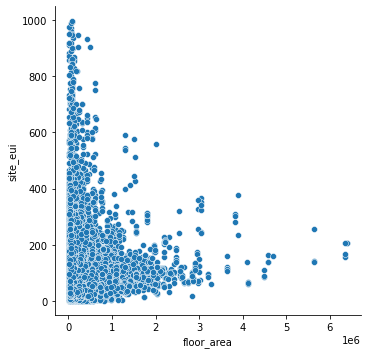

<Figure size 360x360 with 0 Axes>

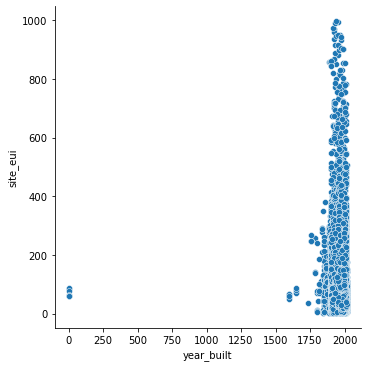

<Figure size 360x360 with 0 Axes>

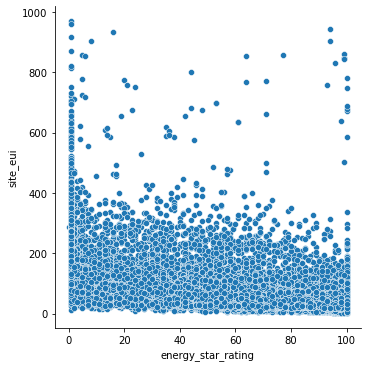

<Figure size 360x360 with 0 Axes>

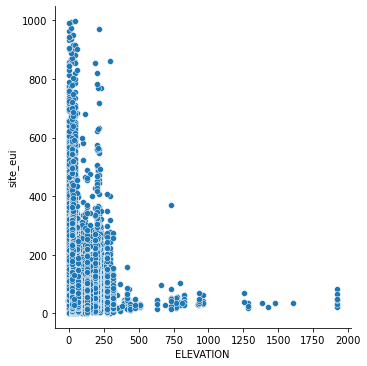

<Figure size 360x360 with 0 Axes>

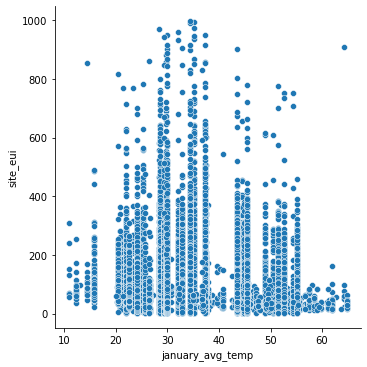

<Figure size 360x360 with 0 Axes>

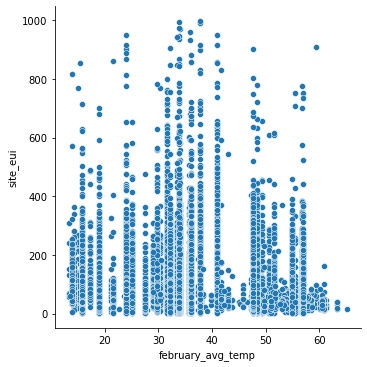

<Figure size 360x360 with 0 Axes>

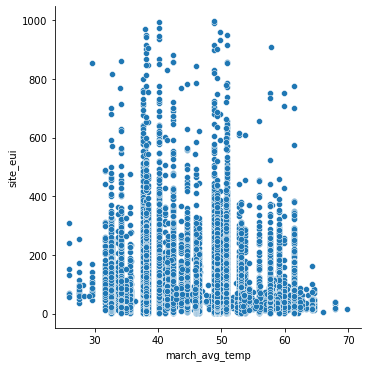

<Figure size 360x360 with 0 Axes>

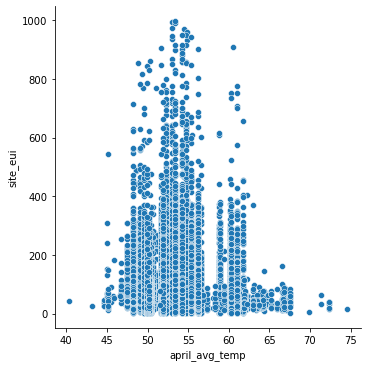

<Figure size 360x360 with 0 Axes>

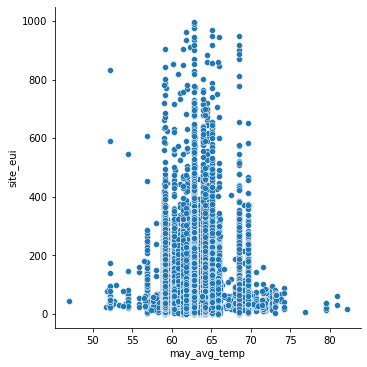

<Figure size 360x360 with 0 Axes>

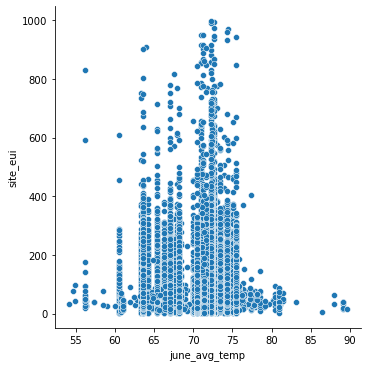

<Figure size 360x360 with 0 Axes>

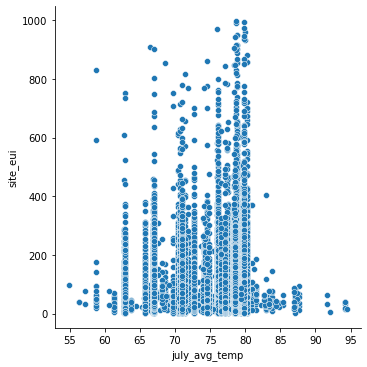

<Figure size 360x360 with 0 Axes>

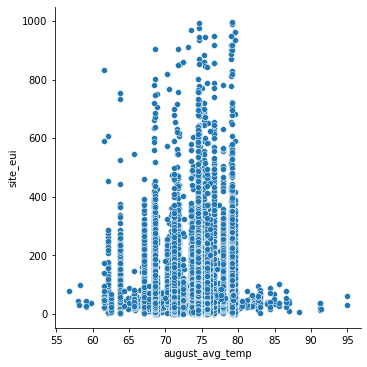

<Figure size 360x360 with 0 Axes>

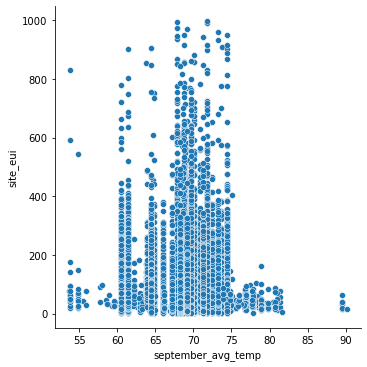

<Figure size 360x360 with 0 Axes>

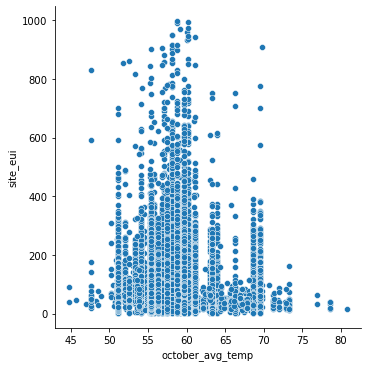

<Figure size 360x360 with 0 Axes>

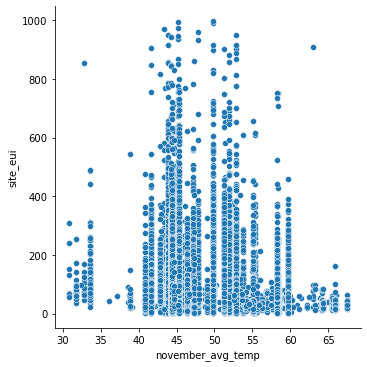

<Figure size 360x360 with 0 Axes>

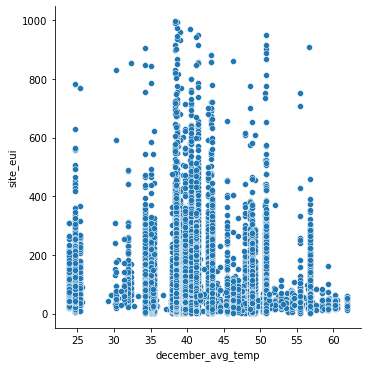

<Figure size 360x360 with 0 Axes>

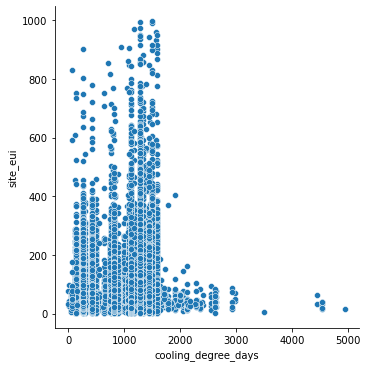

<Figure size 360x360 with 0 Axes>

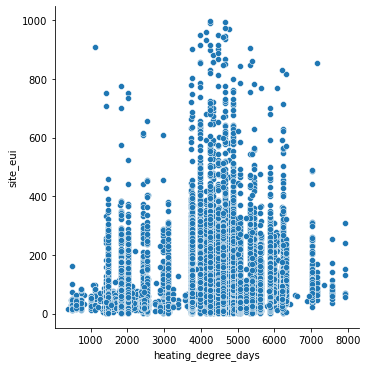

<Figure size 360x360 with 0 Axes>

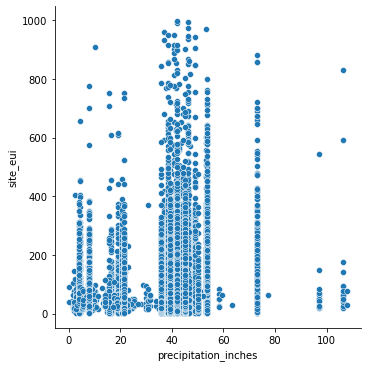

<Figure size 360x360 with 0 Axes>

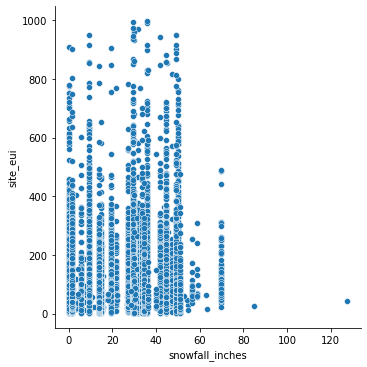

<Figure size 360x360 with 0 Axes>

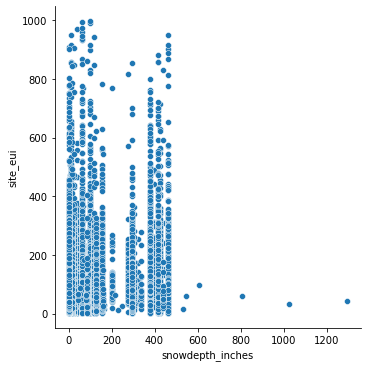

<Figure size 360x360 with 0 Axes>

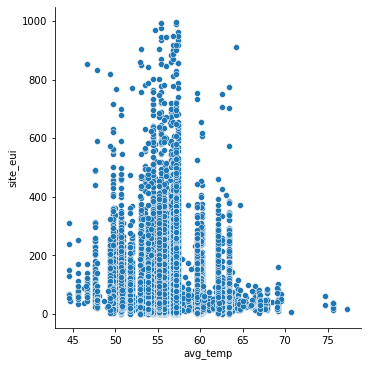

<Figure size 360x360 with 0 Axes>

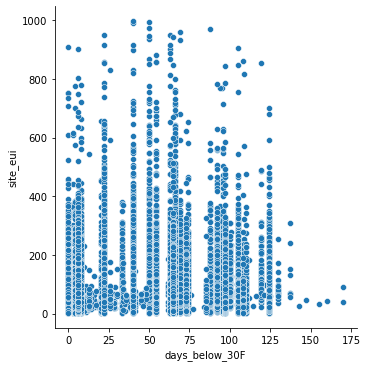

<Figure size 360x360 with 0 Axes>

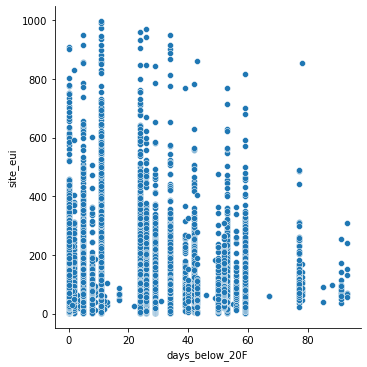

<Figure size 360x360 with 0 Axes>

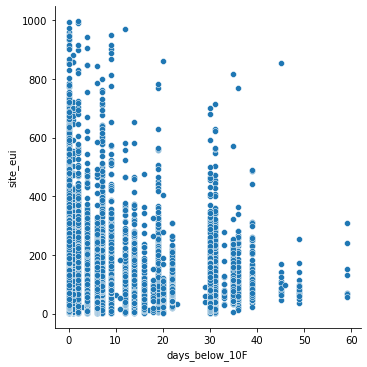

<Figure size 360x360 with 0 Axes>

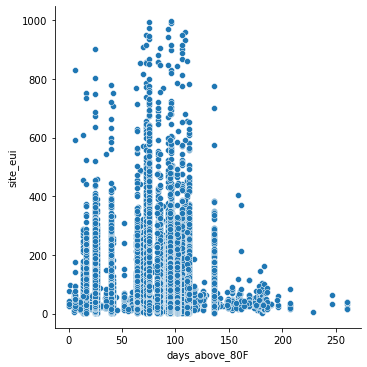

<Figure size 360x360 with 0 Axes>

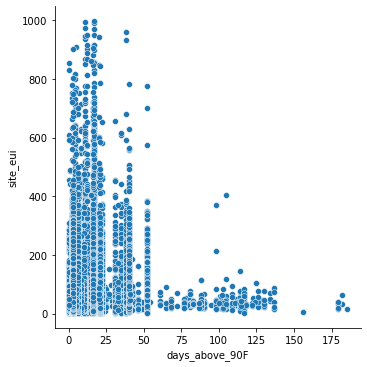

<Figure size 360x360 with 0 Axes>

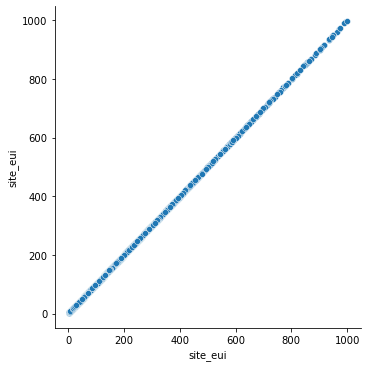

<Figure size 360x360 with 0 Axes>

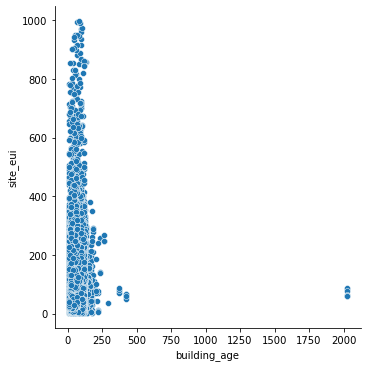

In [54]:
for idx, col in enumerate(train_cont_df.columns):
    plt.figure(idx, figsize=(5,5))
    sns.relplot(x=col, y=train_cont_df["site_eui"], kind="scatter", data=train_cont_df)
    plt.show()

#### Numerical Dist features vs SITE EUI

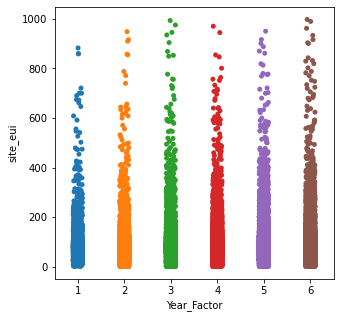

In [55]:
for idx, col in enumerate(train_dis_df.columns):
    plt.figure(idx, figsize=(5,5))
    sns.stripplot(x=col,y=y_train, data=train_dis_df)
    plt.show()

In [56]:
df_train.groupby('Year_Factor')["site_eui"].sum()

Year_Factor
1    1.986199e+05
2    7.491815e+05
3    9.306343e+05
4    1.126191e+06
5    1.471197e+06
6    1.780545e+06
Name: site_eui, dtype: float64

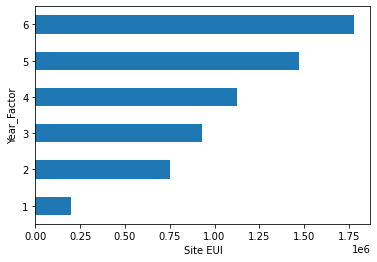

In [57]:
df_train.groupby('Year_Factor')["site_eui"].sum().plot(kind="barh")
plt.xlabel("Site EUI")
plt.show()

In [58]:
groupby_cols = ['State_Factor','building_class','facility_type','floor_area','year_built']
df_all = df.sort_values(by=groupby_cols+['Year_Factor']).reset_index(drop=True)
df_all

NameError: name 'df' is not defined

### Multivariate Analysis

In [105]:
num_cont_df["site_eui"]=y_train


NameError: name 'num_cont_df' is not defined

In [ ]:
corr =pd.DataFrame(num_df.corr().loc[:,"site_eui"]).sort_values(by="site_eui",ascending=False)

In [ ]:
corr[np.abs(corr["site_eui"])>0.3]

In [ ]:
sns.scatterplot(data=num_cont_df,x='energy_star_rating',y='site_eui')

#### Only Energy rating is highly correlated to site_eui

###  PreProcessing 

In [ ]:
# Treating Missing values for cat variables

In [59]:
train_cat_df.isna().sum()

State_Factor      0
building_class    0
facility_type     0
dtype: int64

In [60]:
train_cont_df.columns

Index(['floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_avg_temp', 'february_avg_temp', 'march_avg_temp',
       'april_avg_temp', 'may_avg_temp', 'june_avg_temp', 'july_avg_temp',
       'august_avg_temp', 'september_avg_temp', 'october_avg_temp',
       'november_avg_temp', 'december_avg_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_above_80F', 'days_above_90F', 'site_eui',
       'building_age'],
      dtype='object')

In [61]:
train_dis_df.columns

Index(['Year_Factor'], dtype='object')

In [62]:
df_all = pd.concat([train_cont_df,train_dis_df,train_cat_df],axis=1)


In [63]:
df_all.isna().sum()
#Dropping Building Age


floor_area                  0
year_built               1837
energy_star_rating      26709
ELEVATION                   0
january_avg_temp            0
february_avg_temp           0
march_avg_temp              0
april_avg_temp              0
may_avg_temp                0
june_avg_temp               0
july_avg_temp               0
august_avg_temp             0
september_avg_temp          0
october_avg_temp            0
november_avg_temp           0
december_avg_temp           0
cooling_degree_days         0
heating_degree_days         0
precipitation_inches        0
snowfall_inches             0
snowdepth_inches            0
avg_temp                    0
days_below_30F              0
days_below_20F              0
days_below_10F              0
days_above_80F              0
days_above_90F              0
site_eui                    0
building_age             1837
Year_Factor                 0
State_Factor                0
building_class              0
facility_type               0
dtype: int

In [64]:
df_all["building_age"]=df_all.groupby(['State_Factor', 'building_class', 'facility_type', 'floor_area'])['building_age'].transform(lambda x: x.fillna(x.median()))

In [65]:


df_all['building_age'] =  df_all.groupby(['facility_type'])['building_age'].transform(lambda x: x.fillna(x.median()))

In [66]:
df_all.isna().sum()

floor_area                  0
year_built               1837
energy_star_rating      26709
ELEVATION                   0
january_avg_temp            0
february_avg_temp           0
march_avg_temp              0
april_avg_temp              0
may_avg_temp                0
june_avg_temp               0
july_avg_temp               0
august_avg_temp             0
september_avg_temp          0
october_avg_temp            0
november_avg_temp           0
december_avg_temp           0
cooling_degree_days         0
heating_degree_days         0
precipitation_inches        0
snowfall_inches             0
snowdepth_inches            0
avg_temp                    0
days_below_30F              0
days_below_20F              0
days_below_10F              0
days_above_80F              0
days_above_90F              0
site_eui                    0
building_age                0
Year_Factor                 0
State_Factor                0
building_class              0
facility_type               0
dtype: int

In [68]:
df_all.drop(columns="year_built",inplace=True)

KeyError: "['year_built'] not found in axis"

In [69]:
df_all.isna().sum()

floor_area                  0
energy_star_rating      26709
ELEVATION                   0
january_avg_temp            0
february_avg_temp           0
march_avg_temp              0
april_avg_temp              0
may_avg_temp                0
june_avg_temp               0
july_avg_temp               0
august_avg_temp             0
september_avg_temp          0
october_avg_temp            0
november_avg_temp           0
december_avg_temp           0
cooling_degree_days         0
heating_degree_days         0
precipitation_inches        0
snowfall_inches             0
snowdepth_inches            0
avg_temp                    0
days_below_30F              0
days_below_20F              0
days_below_10F              0
days_above_80F              0
days_above_90F              0
site_eui                    0
building_age                0
Year_Factor                 0
State_Factor                0
building_class              0
facility_type               0
dtype: int64

In [70]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

# impute all the missing data
imputation_cols = ['energy_star_rating', 'building_age', 'floor_area'] 

imputed_data = imputer.fit_transform(df_all[imputation_cols])

df_all1 = pd.DataFrame(imputed_data)

df_all1.columns = imputation_cols

# update energy_star_rating only
#train['energy_star_rating'] = train_temp['energy_star_rating'] 
df_all1

energy_star_rating  building_age  floor_area
0                    11.0          80.0     61242.0
1                    45.0          67.0    274000.0
2                    97.0          71.0    280025.0
3                    46.0          42.0     55325.0
4                   100.0          37.0     66000.0
...                   ...           ...         ...
75752                 8.0          27.0     20410.0
75753                98.0         112.0     40489.0
75754                21.0         105.0     28072.0
75755                61.4          10.0     53575.0
75756                51.0          48.0     23888.0

[75757 rows x 3 columns]

In [71]:
df_all['energy_star_rating']=df_all1['energy_star_rating']

In [72]:
df_all.isna().sum().sum()

0

In [73]:
### Handling Missing Values for Test Set
test_num_df.columns

Index(['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating',
       'ELEVATION', 'january_avg_temp', 'february_avg_temp', 'march_avg_temp',
       'april_avg_temp', 'may_avg_temp', 'june_avg_temp', 'july_avg_temp',
       'august_avg_temp', 'september_avg_temp', 'october_avg_temp',
       'november_avg_temp', 'december_avg_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_above_80F', 'days_above_90F', 'site_eui',
       'building_age'],
      dtype='object')

In [74]:
df_test_all = pd.concat([test_num_df,test_cat_df],axis=1)

In [75]:
df_test_all.shape

(9705, 33)

In [76]:
df_test_all.isna().sum()

Year_Factor                0
floor_area                 0
year_built                92
energy_star_rating      2254
ELEVATION                  0
january_avg_temp           0
february_avg_temp          0
march_avg_temp             0
april_avg_temp             0
may_avg_temp               0
june_avg_temp              0
july_avg_temp              0
august_avg_temp            0
september_avg_temp         0
october_avg_temp           0
november_avg_temp          0
december_avg_temp          0
cooling_degree_days        0
heating_degree_days        0
precipitation_inches       0
snowfall_inches            0
snowdepth_inches           0
avg_temp                   0
days_below_30F             0
days_below_20F             0
days_below_10F             0
days_above_80F             0
days_above_90F             0
site_eui                   0
building_age              92
State_Factor               0
building_class             0
facility_type              0
dtype: int64

In [77]:
df_test_all["building_age"]=df_test_all.groupby(['State_Factor', 'building_class', 'facility_type', 'floor_area'])['building_age'].transform(lambda x: x.fillna(x.median()))

In [78]:
df_test_all['building_age'] =  df_all.groupby(['facility_type'])['building_age'].transform(lambda x: x.fillna(x.median()))

In [79]:
df_test_all.isna().sum()

Year_Factor                0
floor_area                 0
year_built                92
energy_star_rating      2254
ELEVATION                  0
january_avg_temp           0
february_avg_temp          0
march_avg_temp             0
april_avg_temp             0
may_avg_temp               0
june_avg_temp              0
july_avg_temp              0
august_avg_temp            0
september_avg_temp         0
october_avg_temp           0
november_avg_temp          0
december_avg_temp          0
cooling_degree_days        0
heating_degree_days        0
precipitation_inches       0
snowfall_inches            0
snowdepth_inches           0
avg_temp                   0
days_below_30F             0
days_below_20F             0
days_below_10F             0
days_above_80F             0
days_above_90F             0
site_eui                   0
building_age               0
State_Factor               0
building_class             0
facility_type              0
dtype: int64

In [80]:
#imputer = KNNImputer(n_neighbors=5)

# impute all the missing data
imputation_cols = ['energy_star_rating', 'building_age', 'floor_area'] 

imputed_data = imputer.transform(df_test_all[imputation_cols])

df_all2 = pd.DataFrame(imputed_data)

df_all2.columns = imputation_cols

# update energy_star_rating only
#train['energy_star_rating'] = train_temp['energy_star_rating'] 
df_all2

energy_star_rating  building_age  floor_area
0                   37.0          80.0     28484.0
1                   55.0          67.0     21906.0
2                    1.0          71.0     16138.0
3                   34.0          42.0     97422.0
4                   35.0          37.0     61242.0
...                  ...           ...         ...
9700                99.0          12.0    305925.0
9701                94.0          27.0     34909.0
9702                94.0          13.0     42393.0
9703                79.0          12.0     25368.0
9704                87.0          19.0     45640.0

[9705 rows x 3 columns]

In [81]:
df_test_all.drop(columns='year_built',inplace=True)

In [82]:
df_test_all['energy_star_rating'] = df_all2['energy_star_rating']
df_test_all.isna().sum().sum()

0

### Outlier Handling

In [83]:
Q1= df_all.quantile(0.25)
Q3=df_all.quantile(0.75)

IQR = Q3-Q1

In [84]:

df_all = df_all[~((df_all < (Q1 - 1.5 * IQR)) | (df_all > (Q3 + 1.5 * IQR))).any(axis=1)]
df_all.shape

(44361, 32)

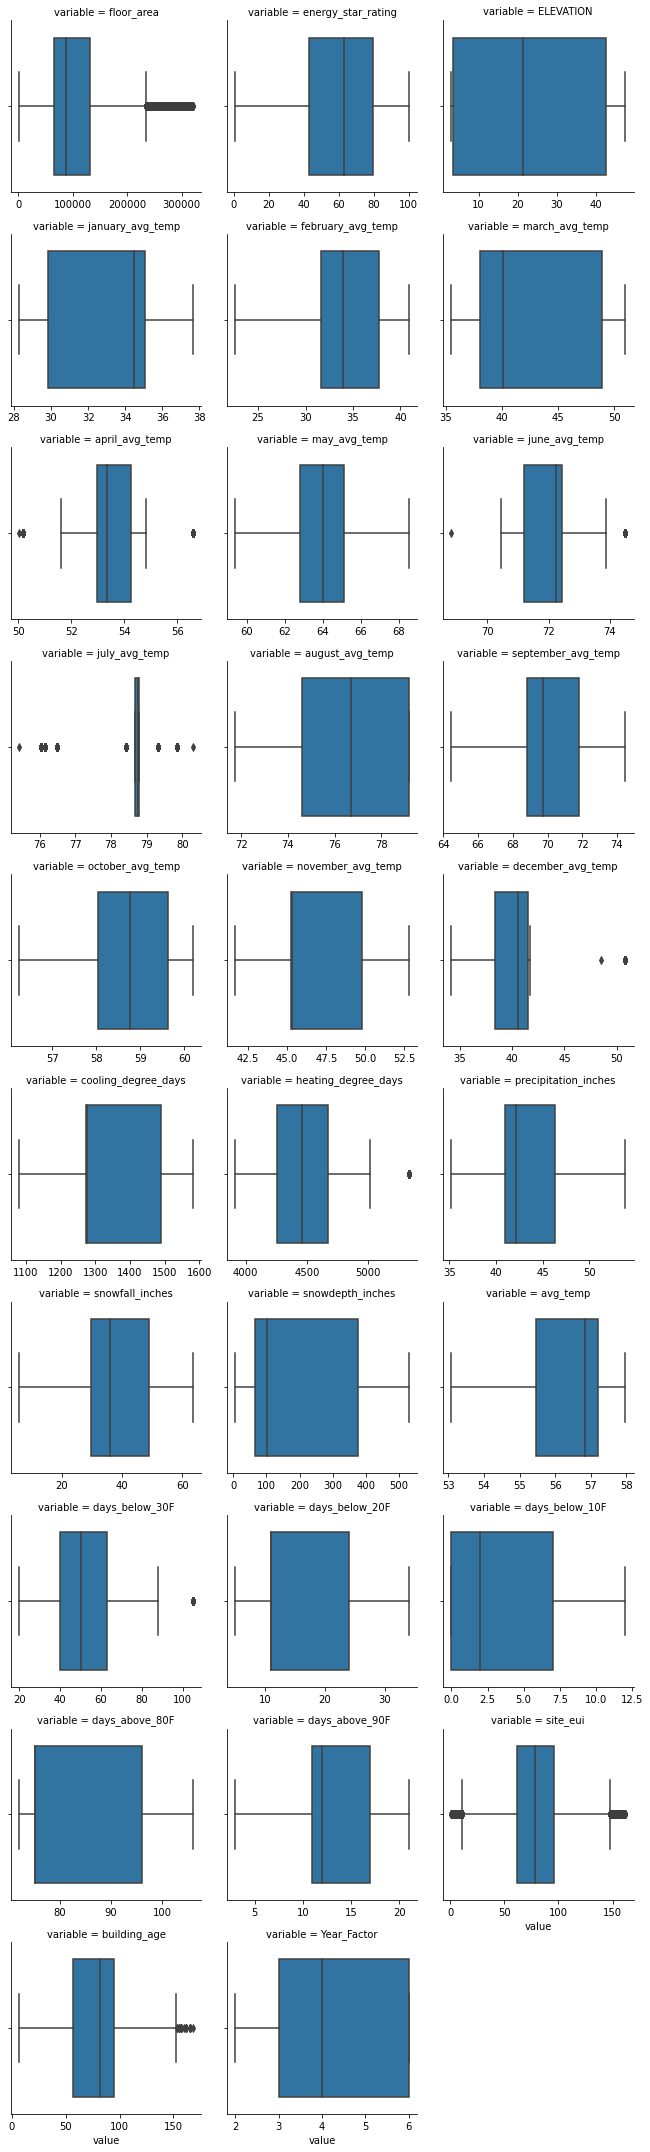

In [85]:
#rechecking for outliers
num_col1 = [i for i in df_all.columns if df_all[i].dtypes !='O']
num_df1=df_all[num_col1]
unpivot = pd.melt(frame=num_df1,value_vars=num_df1.describe().columns[:])
g = sns.FacetGrid(unpivot, col = "variable",col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot,"value")
plt.show()

In [ ]:
#!pip install category_encoders

In [86]:
from category_encoders import TargetEncoder


In [87]:
#Encoding categorical features
for col in cat_col:
    encoder = TargetEncoder()
    df_all[col] = encoder.fit_transform(df_all[col], df_all['site_eui'])
    df_test_all[col] =encoder.transform(df_test_all[col])

In [88]:
##Check the target variable

Text(0.5, 0, 'Original site_eui')

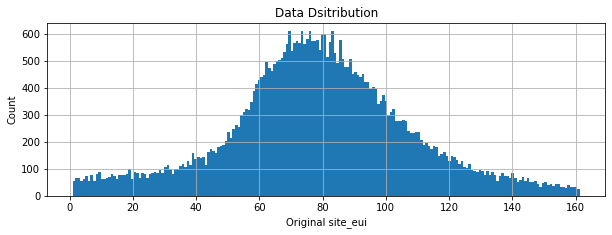

In [89]:
target = 'site_eui'
plt.figure(figsize=(10,7))
plt.subplot(2, 1, 1)
df_all[target].hist(bins=200)
plt.title("Data Dsitribution")
plt.ylabel('Count')
plt.xlabel('Original ' + target)


<AxesSubplot:xlabel='site_eui', ylabel='Density'>

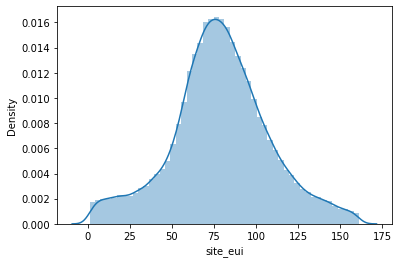

In [90]:
#after outlier treatment the target variable seems to be normally distibuted
sns.distplot(df_all.site_eui)

### Feature Selection

In [91]:
#df_all.drop(columns='id',inplace=True)
features = df_all[df_all.columns.difference( ['site_eui'] )]
target = df_all['site_eui']

In [92]:
features.columns

Index(['ELEVATION', 'State_Factor', 'Year_Factor', 'april_avg_temp',
       'august_avg_temp', 'avg_temp', 'building_age', 'building_class',
       'cooling_degree_days', 'days_above_80F', 'days_above_90F',
       'days_below_10F', 'days_below_20F', 'days_below_30F',
       'december_avg_temp', 'energy_star_rating', 'facility_type',
       'february_avg_temp', 'floor_area', 'heating_degree_days',
       'january_avg_temp', 'july_avg_temp', 'june_avg_temp', 'march_avg_temp',
       'may_avg_temp', 'november_avg_temp', 'october_avg_temp',
       'precipitation_inches', 'september_avg_temp', 'snowdepth_inches',
       'snowfall_inches'],
      dtype='object')

In [106]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

#import itertools

#Checking RFE 

reg = RandomForestRegressor()
#create the RFE model and select 20 attributes
rfe = RFE(reg, n_features_to_select=20)
rfe = rfe.fit(features, target)

In [107]:
RFE_features=features.columns[rfe.get_support()]
features1 = features[RFE_features]
features1.columns

Index(['ELEVATION', 'april_avg_temp', 'august_avg_temp', 'building_age',
       'building_class', 'days_above_90F', 'days_below_30F',
       'december_avg_temp', 'energy_star_rating', 'facility_type',
       'february_avg_temp', 'floor_area', 'january_avg_temp', 'july_avg_temp',
       'june_avg_temp', 'november_avg_temp', 'october_avg_temp',
       'september_avg_temp', 'snowdepth_inches', 'snowfall_inches'],
      dtype='object')

In [108]:
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features1, target)

In [109]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features1.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [110]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value'])

In [111]:
f_reg_results

Variable       F_Value P_Value
9        facility_type   6596.788599   0.000
17  september_avg_temp     42.679100   0.000
16    october_avg_temp    131.373700   0.000
15   november_avg_temp     28.422157   0.000
13       july_avg_temp     24.422425   0.000
12    january_avg_temp    153.159937   0.000
11          floor_area    182.129497   0.000
10   february_avg_temp    163.272873   0.000
18    snowdepth_inches    239.621007   0.000
19     snowfall_inches    217.709308   0.000
7    december_avg_temp     90.114493   0.000
6       days_below_30F     32.497387   0.000
5       days_above_90F    325.406363   0.000
4       building_class    916.823498   0.000
1       april_avg_temp     29.890886   0.000
8   energy_star_rating  16791.665586   0.000
3         building_age     10.132121   0.001
0            ELEVATION      7.275950   0.007
2      august_avg_temp      3.512431   0.061
14       june_avg_temp      1.049602   0.306

In [112]:
features1 = features1.columns.difference(["august_avg_temp",'june_avg_temp'])

In [113]:
final_features= features1

In [114]:
df_final = df_all[features1]
df_final

ELEVATION  april_avg_temp  building_age  building_class  \
5645         3.0       56.583333          54.0       81.152462   
5646         3.0       56.583333          58.0       81.152462   
5647         3.0       56.583333          99.0       81.152462   
5648         3.0       56.583333          54.0       81.152462   
5649         3.0       56.583333          45.0       81.152462   
...          ...             ...           ...             ...   
69257       21.3       50.166667          15.0       81.152462   
69258       21.3       50.166667          98.0       71.512268   
69259       21.3       50.166667         102.0       71.512268   
69261       21.3       50.166667          94.0       71.512268   
69262       21.3       50.166667         168.0       71.512268   

       days_above_90F  days_below_30F  december_avg_temp  energy_star_rating  \
5645               20              66               39.5                73.8   
5646               20              66               39.5                78.4   
5647               20              66               39.5                82.4   
5648               20              66               39.5                33.0   
5649               20              66               39.5                85.2   
...               ...             ...                ...                 ...   
69257              16              73               35.5                73.0   
69258              16              73               35.5                70.0   
69259              16              73               35.5                83.0   
69261              16              73               35.5                77.0   
69262              16              73               35.5                37.2   

       facility_type  february_avg_temp  floor_area  january_avg_temp  \
5645       81.213208          35.732143    319569.0         37.500000   
5646       81.213208          35.732143    200839.0         37.500000   
5647       81.213208          35.732143    149140.0         37.500000   
5648       81.213208          35.732143    179232.0         37.500000   
5649       81.213208          35.732143    291302.0         37.500000   
...              ...                ...         ...               ...   
69257      81.213208          34.051724     83286.0         29.709677   
69258      67.057762          34.051724     54000.0         29.709677   
69259      67.057762          34.051724     86394.0         29.709677   
69261      60.039316          34.051724     59600.0         29.709677   
69262      60.510551          34.051724     82608.0         29.709677   

       july_avg_temp  november_avg_temp  october_avg_temp  september_avg_temp  \
5645       79.322581          44.316667         58.816667               67.16   
5646       79.322581          44.316667         58.816667               67.16   
5647       79.322581          44.316667         58.816667               67.16   
5648       79.322581          44.316667         58.816667               67.16   
5649       79.322581          44.316667         58.816667               67.16   
...              ...                ...               ...                 ...   
69257      76.500000          46.350000         56.258065               69.15   
69258      76.500000          46.350000         56.258065               69.15   
69259      76.500000          46.350000         56.258065               69.15   
69261      76.500000          46.350000         56.258065               69.15   
69262      76.500000          46.350000         56.258065               69.15   

       snowdepth_inches  snowfall_inches  
5645                  6              5.9  
5646                  6              5.9  
5647                  6              5.9  
5648                  6              5.9  
5649                  6              5.9  
...                 ...              ...  
69257               127             34.6  
69258               127             34.6  
69259           

In [115]:
target

5645     13.631540
5646      3.629732
5647     48.721957
5648     94.103528
5649     51.883178
           ...    
69257    34.536271
69258    62.074832
69259    37.797140
69261    52.181943
69262    44.259358
Name: site_eui, Length: 44361, dtype: float64

### Baseline Modelling

In [116]:
## Spliting Dataset
x_train = df_final
y_train= target
x_test = df_test_all[final_features]
y_test = df_test_all["site_eui"]

### Random Forest Algorithm

In [117]:
rf = RandomForestRegressor(random_state=1, criterion='mse', max_depth = 15, min_samples_split= 2)
rf.fit(x_train, y_train)
y_pred =rf.predict(x_test)

In [118]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 56.46263964347403
 MAE: 32.41383896019821
 MSE: 3188.0296755088048
 R2: 0.11827598979406662


In [119]:
xgb = XGBRegressor(n_estimators=500, reg_alpha=0.01, n_jobs=-1)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 59.173750958975035
 MAE: 35.16487782914595
 MSE: 3501.532802554799
 R2: 0.03156938335478454


In [120]:
from catboost import CatBoostRegressor
catb = CatBoostRegressor(iterations=500,
                         learning_rate=0.02,
                         depth=12,
                         eval_metric='RMSE',
#                         early_stopping_rounds=42,
                         random_seed = 23,
                         bagging_temperature = 0.2,
                         od_type='Iter',
                         metric_period = 75,
                         od_wait=100)
catb.fit(x_train, y_train)
                 

y_pred = catb.predict(x_test)

print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

0:	learn: 29.1200970	total: 380ms	remaining: 3m 9s
75:	learn: 22.1234488	total: 8.87s	remaining: 49.5s
150:	learn: 21.0418791	total: 17.4s	remaining: 40.2s
225:	learn: 20.6200562	total: 25.7s	remaining: 31.2s
300:	learn: 20.3316783	total: 34.1s	remaining: 22.6s
375:	learn: 20.1012714	total: 42.5s	remaining: 14s
450:	learn: 19.9070404	total: 50s	remaining: 5.43s
499:	learn: 19.7729159	total: 55s	remaining: 0us
 Training data scores
 --------------------
 RMSE: 56.27636227737716
 MAE: 32.37714365555762
 MSE: 3167.0289511745987
 R2: 0.12408423023154946


In [121]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train,y_train)
y_pred= lm.predict(x_test)


print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 RMSE: 78.82294128206055
 MAE: 55.22255821052554
 MSE: 6213.056072355166
 R2: -0.7183656594655159


In [122]:
from sklearn.neural_network import MLPRegressor


In [123]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')

mlp_reg.fit(x_train, y_train)
y_pred = mlp_reg.predict(x_test)


In [124]:
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 RMSE: 63.52462994220313
 MAE: 40.077975031732635
 MSE: 4035.3786092938503
 R2: -0.11607813359452179


In [125]:
! pip install optuna


You should consider upgrading via the 'C:\Users\gouthaman\anaconda3\python.exe -m pip install --upgrade pip' command.


In [126]:
import optuna

def objective(trial):
    param = {
        "loss_function": trial.suggest_categorical("loss_function", ["RMSE"]),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 1e0),
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-2, 1e0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 10),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 2, 20),
         
    }
    # Conditional Hyper-Parameters
    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    reg = CatBoostRegressor(**param)
    #reg.fit(x_train, y_train, eval_set=[(x_test, y_test)], verbose=0, early_stopping_rounds=100)
    #y_pred = reg.predict(x_test)
   
    kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
    
    scores = cross_val_score(reg, x_train, y_train, cv=kfolds, scoring="neg_root_mean_squared_error")
    
    
    return scores.mean()



In [127]:
from sklearn.model_selection import KFold,cross_val_score

from optuna.samplers import TPESampler

study = optuna.create_study(sampler=TPESampler(), direction="maximize")
study.optimize(objective, n_trials=1) # Run for 10 minutes
print("Number of completed trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial

print("\tBest Score: {}".format(trial.value))
print("\tBest Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2022-05-24 23:43:55,291] A new study created in memory with name: no-name-237128dd-eb72-4b09-9392-004eccc8ec60


0:	learn: 29.3639934	total: 2.16ms	remaining: 2.16s
1:	learn: 29.3366576	total: 5.15ms	remaining: 2.57s
2:	learn: 29.2536991	total: 8.49ms	remaining: 2.82s
3:	learn: 29.2536991	total: 11.2ms	remaining: 2.79s
4:	learn: 29.2536991	total: 13.7ms	remaining: 2.73s
5:	learn: 29.1874474	total: 17.2ms	remaining: 2.85s
6:	learn: 29.1499544	total: 20.8ms	remaining: 2.95s
7:	learn: 29.1398571	total: 23.9ms	remaining: 2.96s
8:	learn: 29.1398571	total: 26.5ms	remaining: 2.92s
9:	learn: 29.0960312	total: 29.7ms	remaining: 2.94s
10:	learn: 28.2948241	total: 33.3ms	remaining: 2.99s
11:	learn: 28.0818614	total: 36.3ms	remaining: 2.98s
12:	learn: 27.4401302	total: 38.8ms	remaining: 2.94s
13:	learn: 27.2882259	total: 41.7ms	remaining: 2.93s
14:	learn: 26.8784767	total: 44.7ms	remaining: 2.94s
15:	learn: 26.8784767	total: 47.6ms	remaining: 2.92s
16:	learn: 26.8449769	total: 50.7ms	remaining: 2.93s
17:	learn: 26.8047332	total: 54ms	remaining: 2.94s
18:	learn: 26.8047332	total: 56.2ms	remaining: 2.9s
19:	le

[I 2022-05-24 23:44:52,532] Trial 0 finished with value: -21.64826667973825 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.12331217204554022, 'l2_leaf_reg': 0.015722606696331576, 'colsample_bylevel': 0.058727777605864374, 'depth': 3, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'min_data_in_leaf': 3, 'subsample': 0.19591615732559592}. Best is trial 0 with value: -21.64826667973825.


Number of completed trials: 1
Best trial:
	Best Score: -21.64826667973825
	Best Params: 
    loss_function: RMSE
    learning_rate: 0.12331217204554022
    l2_leaf_reg: 0.015722606696331576
    colsample_bylevel: 0.058727777605864374
    depth: 3
    boosting_type: Plain
    bootstrap_type: Bernoulli
    min_data_in_leaf: 3
    subsample: 0.19591615732559592


In [128]:
best_params = study.best_params

In [129]:
cb_tuned_model = CatBoostRegressor(**best_params)

In [130]:
cb_tuned_model.fit(x_train,y_train)

0:	learn: 29.3579147	total: 6.61ms	remaining: 6.61s
1:	learn: 29.3579147	total: 13.5ms	remaining: 6.73s
2:	learn: 29.3579147	total: 19.7ms	remaining: 6.54s
3:	learn: 29.3492937	total: 26.6ms	remaining: 6.63s
4:	learn: 29.3492937	total: 33.3ms	remaining: 6.62s
5:	learn: 29.3305010	total: 40.5ms	remaining: 6.71s
6:	learn: 28.7469342	total: 50.2ms	remaining: 7.12s
7:	learn: 28.2632506	total: 60.3ms	remaining: 7.47s
8:	learn: 28.2632506	total: 66ms	remaining: 7.26s
9:	learn: 27.8745535	total: 75.3ms	remaining: 7.45s
10:	learn: 27.6008797	total: 82.3ms	remaining: 7.4s
11:	learn: 27.2128434	total: 92.2ms	remaining: 7.59s
12:	learn: 27.1985303	total: 101ms	remaining: 7.67s
13:	learn: 27.1612273	total: 112ms	remaining: 7.85s
14:	learn: 27.1306009	total: 121ms	remaining: 7.94s
15:	learn: 27.1257509	total: 128ms	remaining: 7.89s
16:	learn: 26.8445621	total: 136ms	remaining: 7.85s
17:	learn: 26.8088637	total: 144ms	remaining: 7.88s
18:	learn: 26.7992954	total: 155ms	remaining: 7.99s
19:	learn: 26

Text(0.5, 0, 'iteration')

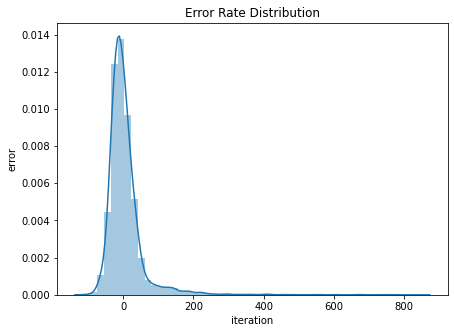

In [131]:
y_hat_tuned = cb_tuned_model.predict(x_test)

plt.figure(figsize = (7,5))
sns.distplot(y_test - y_hat_tuned)
plt.title("Error Rate Distribution");
plt.ylabel("error")
plt.xlabel("iteration")

In [164]:
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_hat_tuned)))
print(" MAE:", mean_absolute_error(y_test,y_hat_tuned))
print(" MSE:", mean_squared_error(y_test,y_hat_tuned))
print(" R2:", r2_score(y_test,y_pred))

 RMSE: 54.81136421013361
 MAE: 30.14267006265474
 MSE: 3004.285646575916
 R2: -0.11607813359452179


### Saving the Model

In [159]:
import pickle 
 
pickle.dump(cb_tuned_model, open('catboost1.pkl', mode='wb') )


### Explainable AI

In [ ]:
import shap
shap.initjs()

In [166]:
x_train.shape

(44361, 18)

In [176]:
x_sample= x_train

In [177]:
explainer = shap.TreeExplainer(cb_tuned_model)
shap_values = explainer.shap_values(x_sample)

### Feature Contribution to the prediction

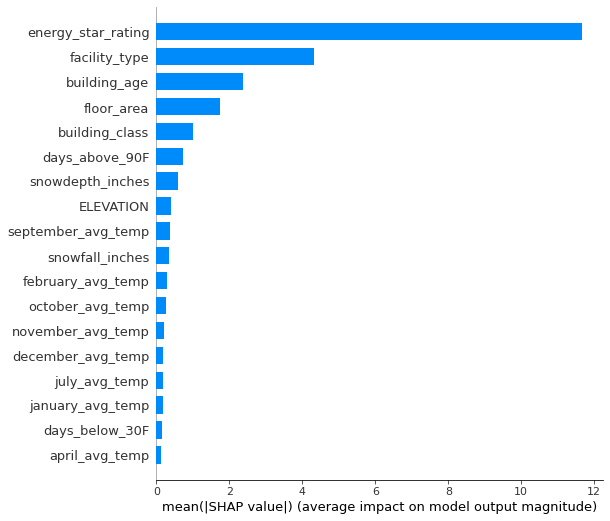

In [179]:
shap.summary_plot(shap_values, x_sample, plot_type="bar")

### Directional Impact of feature to the prediction

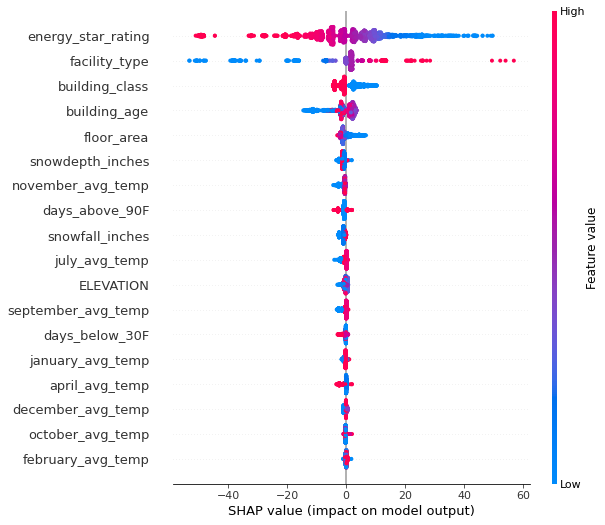

In [174]:
shap.summary_plot(shap_values, x_sample)

### Impacts of different features in induvidual predictions

In [180]:
shap.force_plot(explainer.expected_value, shap_values[0,:], x_sample.iloc[1,:])


In [172]:
shap.force_plot(explainer.expected_value, shap_values,x_sample)

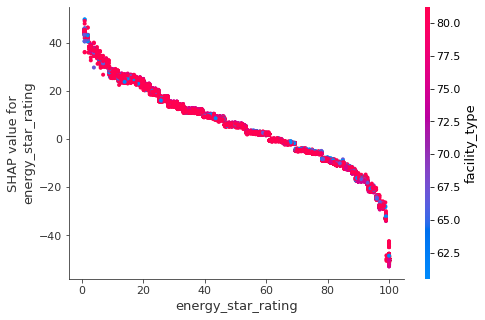

In [191]:
shap.dependence_plot("energy_star_rating",shap_values,features=x_sample,interaction_index='facility_type')